# Machine Learning Workflow
Complete the steps below to complete the machine learning workflow for this classifier.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [3]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def load_data():
    df = pd.read_csv('corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y

def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### Step 1: Load data and perform a train test split

In [7]:
# load data
X, y = load_data()

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

### Step 2: Train classifier
* Fit and transform the training data with `CountVectorizer`. Hint: You can include your tokenize function in the `tokenizer` keyword argument!
* Fit and transform these word counts with `TfidfTransformer`.
* Fit a classifier to these tfidf values.

In [10]:
# Import the necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import GaussianNB

# Instantiate transformers and classifier
vect = CountVectorizer()
tfidf = TfidfTransformer()
clf = GaussianNB()

# Fit and/or transform each to the data
X_train_vect = vect.fit_transform(X_train)
diffed_X_train = tfidf.fit_transform(X_train_vect).toarray()

clf.fit(diffed_X_train, y_train)


GaussianNB(priors=None)

### Step 3: Predict on test data
* Transform (no fitting) the test data with the same CountVectorizer and TfidfTransformer
* Predict labels on these tfidf values.

In [11]:
# Transform test data
X_test_vect = vect.transform(X_test)
diffed_X_test = tfidf.transform(X_test_vect).toarray()

# Predict test labels
y_pred = clf.predict(diffed_X_test)

### Step 4: Display results
Display a confusion matrix and accuracy score based on the model's predictions.

In [21]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
# Printnp.unique(y_test)
labels = np.unique(y_test)
confusion_mat = confusion_matrix(y_test, y_pred, labels)
accuracy = accuracy_score(y_test, y_pred)

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

Labels: ['Action' 'Dialogue' 'Information']
Confusion Matrix:
 [[ 41   0  50]
 [  6  11   8]
 [ 17   0 348]]
Accuracy: 0.831600831601


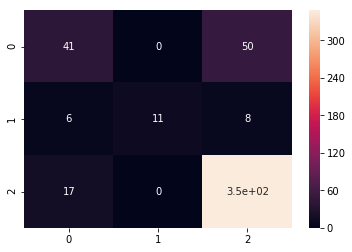

In [23]:
sns.heatmap(confusion_mat, annot=True)

# Final Step: Refactor
Organize these steps into the following functions.

In [ ]:
def display_results():
    # insert step 4 here
    from sklearn.metrics import accuracy_score, confusion_matrix
    import seaborn as sns
    import numpy as np
    # Printnp.unique(y_test)
    labels = np.unique(y_test)
    confusion_mat = confusion_matrix(y_test, y_pred, labels)
    accuracy = accuracy_score(y_test, y_pred)

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)


def main():
    # insert steps 1 through 3 here
    # load data
    X, y = load_data()

     # perform train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)
    # Import the necessary libraries
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    from sklearn.naive_bayes import GaussianNB

    # Instantiate transformers and classifier
    vect = CountVectorizer()
    tfidf = TfidfTransformer()
    clf = GaussianNB()

    # Fit and/or transform each to the data
    X_train_vect = vect.fit_transform(X_train)
    diffed_X_train = tfidf.fit_transform(X_train_vect).toarray()

    clf.fit(diffed_X_train, y_train)
    
    # Transform test data
    X_test_vect = vect.transform(X_test)
    diffed_X_test = tfidf.transform(X_test_vect).toarray()

    # Predict test labels
    y_pred = clf.predict(diffed_X_test)
    
    # Display results
    display_resul

In [ ]:
# run program
main()